In [1]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
import torch

In [2]:
eps = 1e-5
small = 0.1
a = torch.rand(3,4)-small
b = torch.clamp(a, min=eps)
b

tensor([[5.9568e-01, 3.6695e-01, 9.2126e-02, 2.1087e-01],
        [6.3834e-01, 5.6397e-01, 7.8650e-01, 1.0000e-05],
        [7.7157e-01, 1.0000e-05, 7.6560e-01, 1.0000e-05]])

In [11]:
y, sr = librosa.load("dataset/audios/take-five-short.wav")

In [14]:
y = y[:20000]

In [15]:
f0, voiced_flag, voiced_probs = librosa.pyin(y, sr=sr, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
times = librosa.times_like(f0, sr=sr)

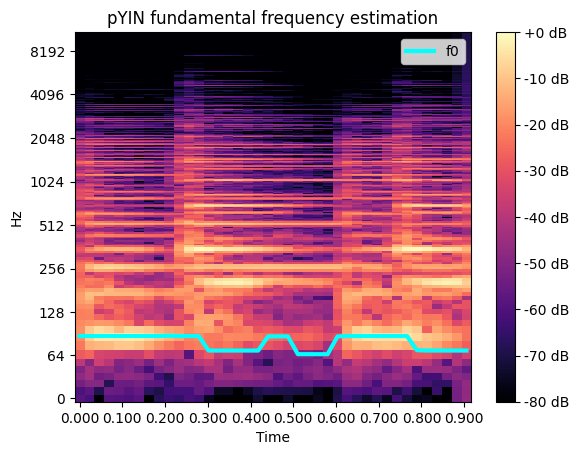

In [16]:
import matplotlib.pyplot as plt
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')